# Final Project: Flight Price Prediction

According to statistics from the Bureau of Transportation, over 853 million passengers traveled through U.S. airports in 2022. In 2020, there were 388 million passengers traveling and in 2021, there were 658 million passengers. The number of travelers has been steadily increasing year by year as the global aviation industry has expanded and demand for tourism has accelerated. However, not everyone in the world can afford to fly because of the high cost of air travel. We hope to give potential passengers and airlines an idea of the market demand and price of air travel. 


In our project we will answer the question:
     Are we able to find the cheapest flight price given certain criteria for flights?

## Part 1: Exploratory Data Analysis

First we need to import the necessary libraries for data analysis and preprocess our [kaggle dataset](https://www.kaggle.com/datasets/dilwong/flightprices). 

,flightDate,segmentsAirlineCode,totalFare,startingAirport,destinationAirport
0,2022-04-17,DL,248.6,ATL,BOS
1,2022-04-17,DL,248.6,ATL,BOS
2,2022-04-17,DL,248.6,ATL,BOS
3,2022-04-17,DL,248.6,ATL,BOS
4,2022-04-17,DL,248.6,ATL,BOS
...,...,...,...,...,...
9995,2022-04-18,UA||UA,322.6,DEN,BOS
9996,2022-04-18,DL||DL,322.6,DEN,BOS
9997,2022-04-18,DL||DL,322.6,DEN,BOS
9998,2022-04-18,DL||DL,322.6,DEN,BOS


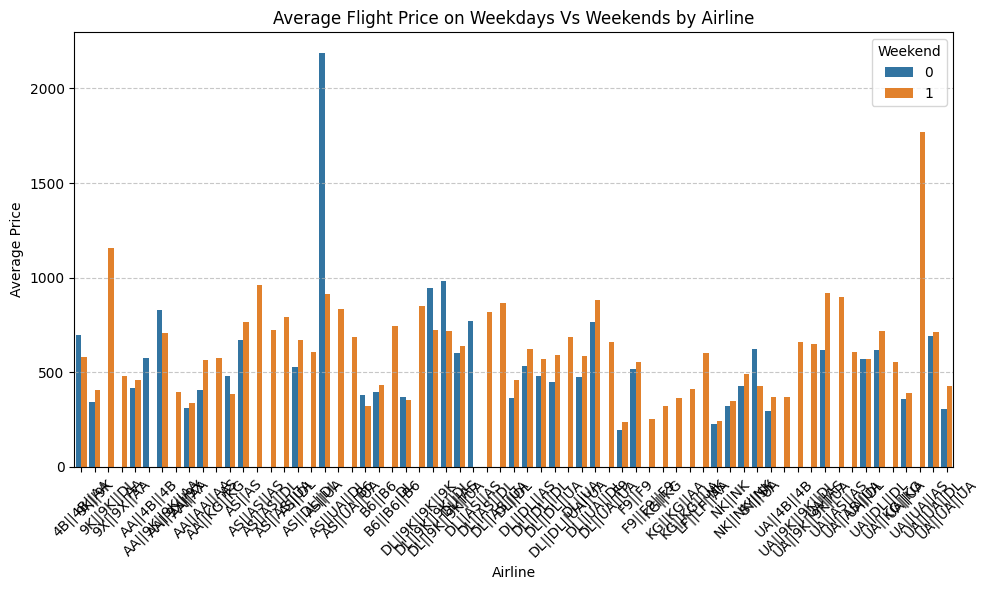

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#include imports for machine learning here

#to create the complex graph network
import networkx as nx 
#use pyvis to generate better looking graphs
#rom pyvis.network import Network

#chunk the data - use a preditermined chunking pattern before the dataset is loaded in. 
columns = ['flightDate', 'segmentsAirlineCode', 'totalFare', 'startingAirport', 'destinationAirport']


chunksize=10000
flight_price_dataset = pd.read_csv("data/itineraries.csv", chunksize=chunksize)
week_analysis_data = next(flight_price_dataset)
# week_analysis_data = week_analysis_data.sample(frac=1, random_state=42)
# display(week_analysis_data)
week_analysis_data = week_analysis_data[columns]
display(week_analysis_data)
#for data analysis of weekend prices v. weekday prices.
# only focus on a set starting point and destination point or make a clear distinction in presentation
week_analysis_df = week_analysis_data[['segmentsAirlineCode', 'totalFare', 'flightDate']].copy()




week_analysis_df['flightDate'] = pd.to_datetime(week_analysis_df['flightDate'], format='%Y-%m-%d')
week_analysis_df['Weekday'] = week_analysis_df['flightDate'].dt.day_name()
week_analysis_df['Weekend'] = week_analysis_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)

#make codes to correlate between the airline and the full name


agg_data = week_analysis_df.groupby(['segmentsAirlineCode', 'Weekend'])['totalFare'].mean().reset_index()

# Plot the aggregated data
plt.subplots(figsize=(10, 6))
sns.barplot(data=agg_data, x='segmentsAirlineCode', y='totalFare', hue='Weekend')
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.title("Average Flight Price on Weekdays Vs Weekends by Airline")
plt.legend(title='Weekend', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#this currently prints but I need to preprocess data so that the graph looks more visually appealing. 